<a href="https://colab.research.google.com/github/SirNavalot/BiostatisticsMPCR/blob/main/Shaurnav_Biostatistics_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2

# Turning biology into mathematics

In this lab demonstration we will access the uniprot database and create a new dataset. Our dataset will consist of four thousand proteins, half associated with the keyword antibody and the other half not related to the keyword. The proteins are represented by their primary structure sequence of amino acids, in other words each protein is a string of letters representing each amino acid in the sequence. (Don't worry if these ideas are new to you.)

The one-letter and three-letter codes for amino acids used in the knowledgebase are those adopted by the commission on Biochemical Nomenclature of the IUPAC-IUB

One-letter code	Three-letter code	Amino-acid name

A	Ala	  Alanine

R	Arg	  Arginine

N	Asn	  Asparagine

D	Asp	  Aspartic acid

C	Cys	  Cysteine

Q	Gln	  Glutamine

E	Glu	  Glutamic acid

G	Gly	  Glycine

H	His	  Histidine

I	Ile	  Isoleucine

L	Leu	  Leucine

K	Lys	  Lysine

M	Met	  Methionine

F	Phe	  Phenylalanine

P	Pro	  Proline

S	Ser	  Serine

T	Thr	  Threonine

W	Trp	  Tryptophan

Y	Tyr	  Tyrosine

V	Val	  Valine

O	Pyl	  Pyrrolysine

U	Sec	  Selenocysteine

B	Asx	  Aspartic acid or Asparagine

Z	Glx	  Glutamic acid or Glutamine

X	Xaa	  Any amino acid


In [1]:
!pip install git+https://github.com/williamedwardhahn/mpcr #Basic pip installatio
from mpcr import * #Asterisk usually denotes "all" 

  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-pfjxlok7
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-pfjxlok7
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-cp36-none-any.whl size=5914 sha256=eea9cb7d60bc1e57906806eadeef46a41094a3843574f5f228be8c4441c50f81
  Stored in directory: /tmp/pip-ephem-wheel-cache-cv_gvnwh/wheels/89/93/47/ef43fe80a5b823a05d8dcca5ed1581f4fcdacf69b27110603f
Successfully built ImportMPCR


In [2]:
# This code will create a dataset from the uniprot database
X, Y = get_uniprot_data('=antibody', '!antibody', 2000) 
print(type(X)) #debugging purposes 
print(type(Y)) #debugging purposes
#get_uniprot_data returns two lists

<class 'list'>
<class 'list'>


In [3]:
number_X = len(X)
number_Y = len(Y)

In [4]:
print(number_X)
print(number_Y)

2000
2000


In [5]:
X[0] #Amino acid sequence of the first protein on the list of proteins associated with 'antibody' => List of lists

'mahcteymnapkklpadvaeelattaqklvqagkgilaadestqtikkrfdniklentienrasyrdllfgtkglgkfisgailfeetlfqkneagvpmvnllhneniipgikvdkglvnipctdeekstqgldglaerckeyykagarfakwrtvlvidtakgkptdlsihetawglaryasicqqnrlvpivepeiladgphsievcavvtqkvlscvfkalqengvllegallkpnmvtagyectaktttqdvgfltvrtlrrtvppalpgvvflsggqseeeasvnlnsinalgphpwaltfsygralqasvlntwqgkkenvakarevllqraeanslatygkykggaggenagaslyekkyvy'

Turn protein strings of letters into vectors of numbers:

In [6]:
def process_strings(c):
    '''Takes in a list of sequences 'c' and turns each one
       into a list of numbers.'''
       
    X = []
            
    for  m, seq in enumerate(c):
        x = [] 
        for letter in seq:
            x.append(max(ord(letter)-97, 0))
        
        X.append(x)
        
    return X

In [7]:
X = process_strings(X)
Y = process_strings(Y)

In [11]:
print(X[0])

[12, 0, 7, 2, 19, 4, 24, 12, 13, 0, 15, 10, 10, 11, 15, 0, 3, 21, 0, 4, 4, 11, 0, 19, 19, 0, 16, 10, 11, 21, 16, 0, 6, 10, 6, 8, 11, 0, 0, 3, 4, 18, 19, 16, 19, 8, 10, 10, 17, 5, 3, 13, 8, 10, 11, 4, 13, 19, 8, 4, 13, 17, 0, 18, 24, 17, 3, 11, 11, 5, 6, 19, 10, 6, 11, 6, 10, 5, 8, 18, 6, 0, 8, 11, 5, 4, 4, 19, 11, 5, 16, 10, 13, 4, 0, 6, 21, 15, 12, 21, 13, 11, 11, 7, 13, 4, 13, 8, 8, 15, 6, 8, 10, 21, 3, 10, 6, 11, 21, 13, 8, 15, 2, 19, 3, 4, 4, 10, 18, 19, 16, 6, 11, 3, 6, 11, 0, 4, 17, 2, 10, 4, 24, 24, 10, 0, 6, 0, 17, 5, 0, 10, 22, 17, 19, 21, 11, 21, 8, 3, 19, 0, 10, 6, 10, 15, 19, 3, 11, 18, 8, 7, 4, 19, 0, 22, 6, 11, 0, 17, 24, 0, 18, 8, 2, 16, 16, 13, 17, 11, 21, 15, 8, 21, 4, 15, 4, 8, 11, 0, 3, 6, 15, 7, 18, 8, 4, 21, 2, 0, 21, 21, 19, 16, 10, 21, 11, 18, 2, 21, 5, 10, 0, 11, 16, 4, 13, 6, 21, 11, 11, 4, 6, 0, 11, 11, 10, 15, 13, 12, 21, 19, 0, 6, 24, 4, 2, 19, 0, 10, 19, 19, 19, 16, 3, 21, 6, 5, 11, 19, 21, 17, 19, 11, 17, 17, 19, 21, 15, 15, 0, 11, 15, 6, 21, 21, 5, 11, 18

In [10]:
print(Y[0])

[12, 10, 19, 11, 11, 11, 19, 11, 21, 21, 21, 19, 8, 21, 2, 11, 3, 11, 6, 24, 19, 11, 10, 2, 7, 13, 19, 16, 11, 15, 5, 8, 24, 13, 19, 2, 15, 4, 6, 10, 13, 11, 2, 5, 10, 0, 19, 11, 10, 5, 15, 11, 10, 5, 15, 21, 10, 17, 6, 2, 0, 0, 19, 2, 15, 17, 18, 18, 18, 11, 21, 10, 21, 21, 2, 2, 10, 19, 3, 10, 2, 13]


(array([40.,  0.,  7., 11., 29., 10., 31.,  5., 17.,  0., 29., 39.,  4.,
        19.,  0., 15., 14., 14., 16., 26.,  0., 27.,  4.,  0., 12.]),
 array([ 0.  ,  0.96,  1.92,  2.88,  3.84,  4.8 ,  5.76,  6.72,  7.68,
         8.64,  9.6 , 10.56, 11.52, 12.48, 13.44, 14.4 , 15.36, 16.32,
        17.28, 18.24, 19.2 , 20.16, 21.12, 22.08, 23.04, 24.  ]),
 <a list of 25 Patch objects>)

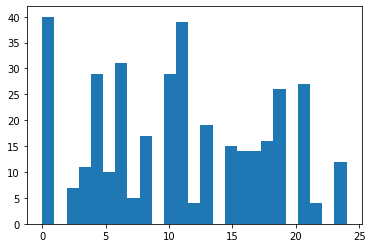

In [12]:
plt.hist(X[0],25) #plt => matplotlib.pyplot

(array([ 3.,  0.,  9.,  2.,  1.,  4.,  3.,  1.,  2.,  0., 10., 12.,  1.,
         4.,  0.,  5.,  1.,  2.,  3.,  9.,  0.,  8.,  0.,  0.,  2.]),
 array([ 0.  ,  0.96,  1.92,  2.88,  3.84,  4.8 ,  5.76,  6.72,  7.68,
         8.64,  9.6 , 10.56, 11.52, 12.48, 13.44, 14.4 , 15.36, 16.32,
        17.28, 18.24, 19.2 , 20.16, 21.12, 22.08, 23.04, 24.  ]),
 <a list of 25 Patch objects>)

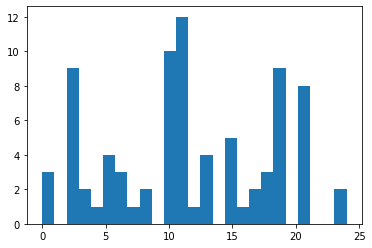

In [13]:
plt.hist(Y[0],25)

In [16]:
np.mean(X[0]),np.std(X[0], dtype=np.float64) #meaningful? => 
#relates to what we see in the histogram (the data deviates from the median, but I think it would be more "meaningful"
#if we readily knew what the ranges were...

(10.829268292682928, 6.93606964110298)

In [17]:
np.array(X[0]).shape

(369,)

Find lengths of all proteins:

In [18]:
X_lengths = [len(s) for s in X]
Y_lengths = [len(s) for s in Y] #iterates through each X and Y for each "protein's" length

In [20]:
np.max(X_lengths)

5654

In [21]:
np.max(Y_lengths)

3987

In [22]:
np.min(X_lengths)

5

In [23]:
np.min(Y_lengths)

8

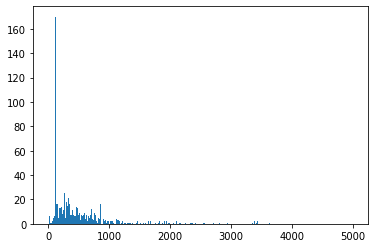

In [24]:
plt.hist(X_lengths,bins=1000,range=(0,5000));

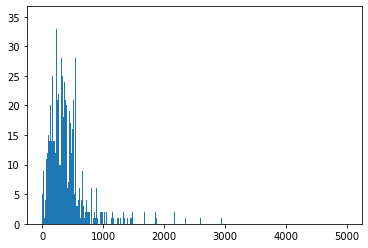

In [25]:
plt.hist(Y_lengths,bins=1000,range=(0,5000)); # number of bins "more spikey" groups with more divisions